# Working with multiple stocks

In [31]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [32]:
# Define a date range
dates = pd.date_range('2017-07-01', '2017-07-31')

# Choose stock symbols to read
symbols = ['googl', 'ibm', 'gld']

df = pd.DataFrame(index=dates)

In [33]:
# Fill dataframw with stock data (close) for given symbols 

if 'spy' not in symbols:  # add SPY for reference, if absent
    symbols.insert(0, 'spy')

for sym in symbols:
    df_temp = pd.read_csv("data/{}.csv".format(sym), index_col='Date', parse_dates=True, 
                          usecols=['Date', 'Close'], na_values=['nan'])
    df_temp = df_temp.rename(columns = {'Close': sym})
    df = df.join(df_temp)
    if sym == 'spy': # drop dates SPY did not trade
        df = df.dropna(subset=["spy"])     

df.head()

,spy,googl,ibm,gld
2017-07-03,242.21,919.46,155.58,116.09
2017-07-05,242.77,932.26,153.67,116.52
2017-07-06,240.55,927.69,152.36,116.47
2017-07-07,242.11,940.81,152.94,115.28
2017-07-10,242.37,951.00,153.42,115.47


In [34]:
# selection
df.loc['2017-07-12':'2017-07-15',['googl','ibm']]

,googl,ibm
2017-07-12,967.66,153.70
2017-07-13,968.85,153.63
2017-07-14,976.91,154.24


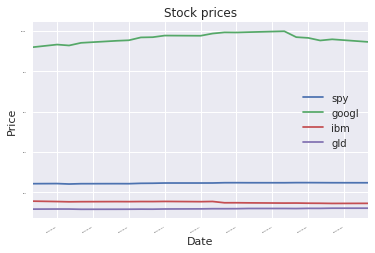

In [45]:
# plot stock prices
def plot_stock(data):
    ax = data.plot(title="Stock prices", fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")

plot_stock(df)

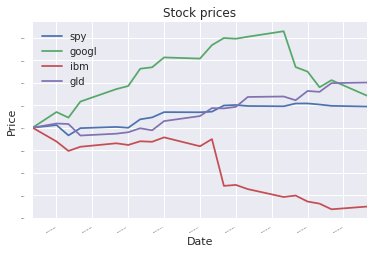

In [46]:
# normalize data based on fist row
normalized_df = df / df.iloc[0]
plot_stock(normalized_df)